In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams['animation.html'] = 'html5'

In [2]:
# Set up physical problem
nx = 41
ny = 41
Lx = 1.
Ly = 1.
dx = Lx/(nx-1)
dy = Ly/(ny-1)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
ω1 = 2*np.pi
ω2 = 2*np.pi
μ = 1e-4

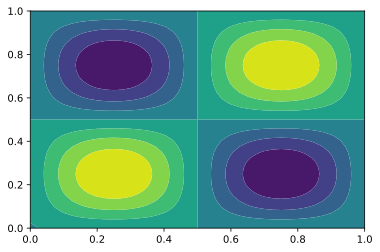

In [3]:
u0 = lambda x, y: np.sin(ω1*x)*np.sin(ω2*y)
xx, yy = np.meshgrid(x, y)
plt.contourf(xx, yy, u0(xx,yy))

In [4]:
cx = 1.
cy = 1.
dt = 1e-3
tend = 0.5
t = 0.

cflx = cx*dt/dx
cfly = cy*dt/dy

sol = []
u = np.zeros((nx+2,ny+2))
u[1:-1,1:-1] = u0(xx,yy)
u[:,0] = u[:,-3]
u[:,-1] = u[:,2]
u[0,:] = u[-3,:]
u[-1,:] = u[2,:]
sol.append(u)

In [5]:
while t < tend:
    un = sol[-1]
    unew = np.copy(un)
    unew[1:-1,1:-1] = un[1:-1,1:-1] - cflx*(un[1:-1,1:-1]-un[1:-1,:-2]) - cfly*(un[1:-1,1:-1]-un[:-2,1:-1])
    
    unew[:,0] = unew[:,-3]
    unew[:,-1] = unew[:,2]
    unew[0,:] = unew[-3,:]
    unew[-1,:] = unew[2,:]
    sol.append(unew)
    t += dt

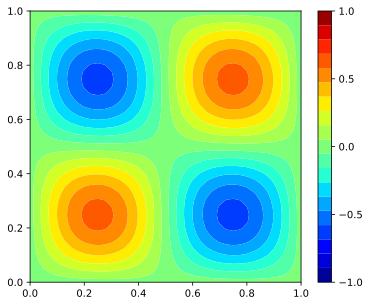

In [6]:
ims = []
fig = plt.figure(figsize=(6.1,5), facecolor='w')
levs = np.linspace(-1,1,20)
t = 0.0
i = 0
for solution in sol:
    if (i%10==0): # output frequency for frames  
        im = plt.contourf(xx,yy,solution[1:-1,1:-1],cmap=cm.jet, levels=levs,vmax=1.,vmin=-1.)
        ims.append(im.collections)
    i+=1
    t += dt

cbar = plt.colorbar()
plt.clim(-1,1)
cbar.set_ticks(np.linspace(-1,1,5))
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,
                                repeat_delay=1000)
# ani.save('ftus.mp4')   
ani